# image classification of 60k small images , the dataset from cifar-10 database-tensorflow

In [70]:
#load essential libraries
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np


# Data Exploration Part

In [68]:
#load the databased cifar10
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()
# training samples are 50000 each sample is 32*32 image and 3- RGB channel
X_train.shape

(50000, 32, 32, 3)

In [69]:
#shape of the test sample
X_test.shape

(10000, 32, 32, 3)

In [7]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

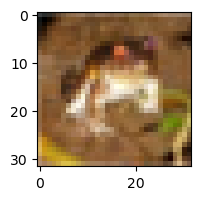

In [71]:
#plot the image
plt.figure(figsize=(15,2))
plt.imshow(X_train[0])

In [13]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [22]:
#reshaping array from 2-dimensional to 1-dimensional
y_train=y_train.reshape(-1,)
y_train[:5]


array([6, 9, 9, 4, 1], dtype=uint8)

In [73]:
#list variable
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [19]:
classes[9]

'truck'

In [72]:
#print the image with labels
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

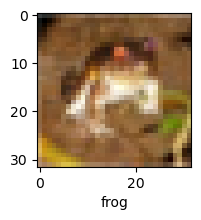

In [28]:
plot_sample(X_train,y_train,0)

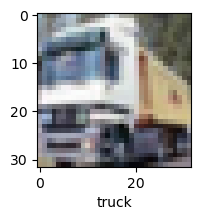

In [29]:
plot_sample(X_train,y_train,1)

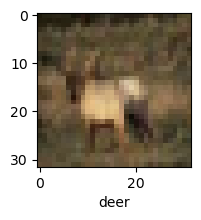

In [30]:
plot_sample(X_train,y_train,3)

In [31]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

# Normalization

In [33]:
# if we divide each pixel by 255, then we will be normalizing it between 0-1
X_train=X_train/255
X_test=X_test/255

# Build a simple artificial neural network

In [34]:
#Building an artificial network
ann=models.Sequential([
    #first layer
    layers.Flatten(input_shape=(32,32,3)),
    #two deep layer
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])

ann.compile(optimizer='SGD',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])
ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 158s 98ms/step - loss: 1.8121 - accuracy: 0.3540
Epoch 2/5
1563/1563 [==============================] - 146s 94ms/step - loss: 1.6254 - accuracy: 0.4289
Epoch 3/5
1563/1563 [==============================] - 155s 99ms/step - loss: 1.5423 - accuracy: 0.4548
Epoch 4/5
1563/1563 [==============================] - 164s 105ms/step - loss: 1.4847 - accuracy: 0.4779
Epoch 5/5
1563/1563 [==============================] - 152s 97ms/step - loss: 1.4355 - accuracy: 0.4959


Note: when every you have 'Y' as one hot endoded value then use categorical_cross_entropy
if y value is a number then use sparse_category_entropy

In [75]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_pred=ann.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred]

print('Classification Report:\n',classification_report(y_test,y_pred_classes))

#accuracy is very low 

313/313 [==============================] - 9s 30ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.17      0.95      0.28      1000
           1       0.26      0.33      0.29      1000
           2       0.14      0.31      0.20      1000
           3       0.20      0.16      0.18      1000
           4       0.32      0.01      0.01      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       1.00      0.00      0.00      1000
           8       1.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.18     10000
   macro avg       0.31      0.18      0.10     10000
weighted avg       0.31      0.18      0.10     10000



C:\Users\KIRAN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KIRAN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KIRAN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [76]:
#build a convoultional neural network
cnn=models.Sequential([
    
    #cnn
    #convoultional value
    layers.Conv2D(filters=32, kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    #pooling
    layers.MaxPooling2D(2,2),
    
    #second layer as above
    layers.Conv2D(filters=32, kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D(2,2),
    
    #dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax') #softmax is popular activation function
])

In [78]:
cnn.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [79]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 43s 27ms/step - loss: 2.0445 - accuracy: 0.3024
Epoch 2/10
1563/1563 [==============================] - 42s 27ms/step - loss: 1.4628 - accuracy: 0.4779
Epoch 3/10
1563/1563 [==============================] - 40s 26ms/step - loss: 1.2770 - accuracy: 0.5495
Epoch 4/10
1563/1563 [==============================] - 42s 27ms/step - loss: 1.1433 - accuracy: 0.5972
Epoch 5/10
1563/1563 [==============================] - 43s 27ms/step - loss: 1.0542 - accuracy: 0.6337
Epoch 6/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.9893 - accuracy: 0.6589
Epoch 7/10
1563/1563 [==============================] - 41s 26ms/step - loss: 0.9316 - accuracy: 0.6786
Epoch 8/10
1563/1563 [==============================] - 45s 28ms/step - loss: 0.8900 - accuracy: 0.6927
Epoch 9/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.8492 - accuracy: 0.7057
Epoch 10/10
1563/1563 [==============================] - 45s 29m

In [81]:
#test this on testset
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 11ms/step - loss: 1.1061 - accuracy: 0.6515


[1.1061474084854126, 0.6514999866485596]

In [82]:
#reshaping it to 1 dimensional array
y_test=y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

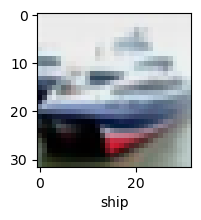

In [83]:
#ploting samples 
plot_sample(X_test,y_test,1)

In [84]:
#predict all xtest values
y_pred=cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 3s 8ms/step


array([[9.33731999e-03, 1.07644172e-02, 2.90415734e-02, 4.33861673e-01,
        1.04748994e-01, 1.16737440e-01, 9.00882334e-02, 8.04894697e-03,
        1.89828560e-01, 7.54286209e-03],
       [1.47246107e-01, 2.83292115e-01, 7.27291649e-07, 6.50244885e-07,
        3.60810759e-06, 5.72114001e-09, 7.31779792e-09, 8.50289325e-07,
        5.68638265e-01, 8.17622116e-04],
       [5.06684855e-02, 7.19635282e-03, 4.10039560e-04, 2.46518699e-04,
        8.79568106e-05, 1.62674733e-05, 4.81434563e-06, 5.63920294e-05,
        9.37527597e-01, 3.78557015e-03],
       [8.30836415e-01, 1.90033391e-03, 6.05282187e-03, 5.28240926e-04,
        4.58303131e-02, 3.34899378e-05, 9.10573144e-05, 1.60328826e-04,
        1.13098048e-01, 1.46890536e-03],
       [3.47005516e-05, 6.37059566e-06, 3.11865993e-02, 3.44006461e-03,
        9.02475774e-01, 5.96477278e-03, 5.30404337e-02, 3.84681905e-03,
        3.30309922e-06, 1.12418218e-06]], dtype=float32)

In [85]:
#find which element of ypred is max
np.argmax([5,12,1,2])

1

In [86]:
np.argmax([5,12,167,2])

2

In [87]:
#no 3 is the max element
np.argmax(y_pred[0])

3

In [88]:
#compare classes with the sample elements
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

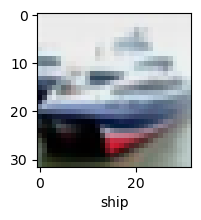

In [89]:
#compare sample with class
plot_sample(X_test,y_test,1)

In [90]:
#actual values
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [91]:
#predicted values
classes[y_classes[1]]

'ship'

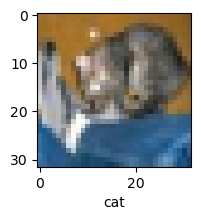

In [92]:
plot_sample(X_test,y_test,0)

In [93]:
classes[y_classes[0]]

'cat'

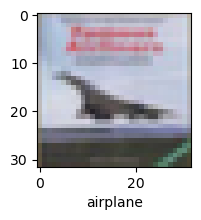

In [94]:
plot_sample(X_test,y_test,3)

In [95]:
classes[y_classes[3]]

'airplane'

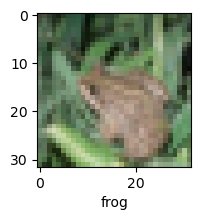

In [96]:
plot_sample(X_test,y_test,4)

In [97]:
classes[y_classes[4]]


'deer'

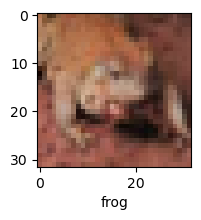

In [98]:
plot_sample(X_test,y_test,5)

In [99]:
classes[y_classes[5]]


'frog'

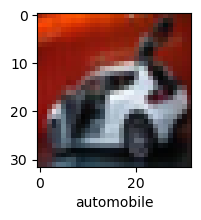

In [100]:
plot_sample(X_test,y_test,6)

In [102]:
classes[y_classes[6]]


'airplane'

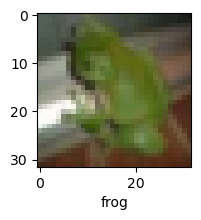

In [103]:
plot_sample(X_test,y_test,7)

In [104]:
classes[y_classes[7]]


'frog'

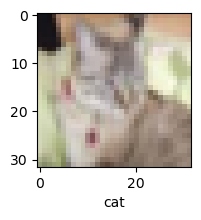

In [105]:
plot_sample(X_test,y_test,8)

In [106]:
classes[y_classes[8]]


'cat'

In [107]:
print('classification report:\n',classification_report(y_test,y_classes))

classification report:
               precision    recall  f1-score   support

           0       0.65      0.73      0.68      1000
           1       0.75      0.76      0.76      1000
           2       0.57      0.49      0.53      1000
           3       0.50      0.42      0.46      1000
           4       0.60      0.55      0.58      1000
           5       0.57      0.58      0.58      1000
           6       0.73      0.73      0.73      1000
           7       0.68      0.73      0.70      1000
           8       0.69      0.79      0.74      1000
           9       0.72      0.73      0.73      1000

    accuracy                           0.65     10000
   macro avg       0.65      0.65      0.65     10000
weighted avg       0.65      0.65      0.65     10000

